# SARIMAX

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('flights')

In [4]:
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth',inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearMonth', ylabel='passengers'>

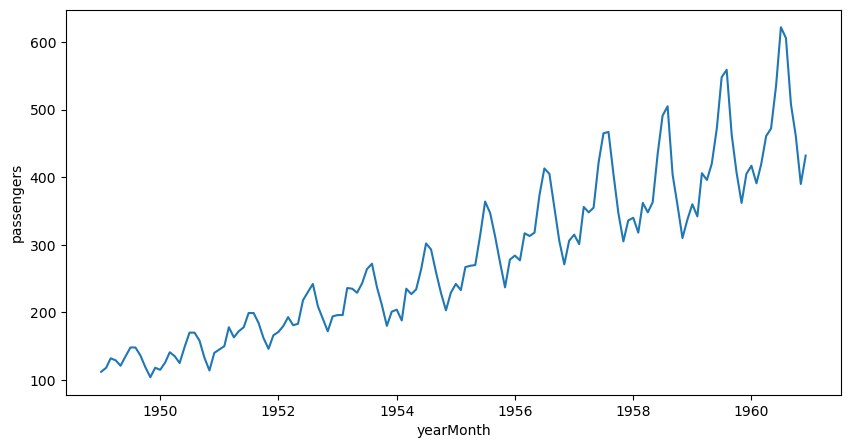

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)

In [6]:
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

result = adfuller(df['passengers'])

table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | 0.8153688792060547            |
| P-valeur       | 0.9918802434376411            |
| Conclusion     | La série est non stationnaire |


ADF Statistic: -2.829267
p-value: 0.054213
The 'Sales' column is non-stationary.


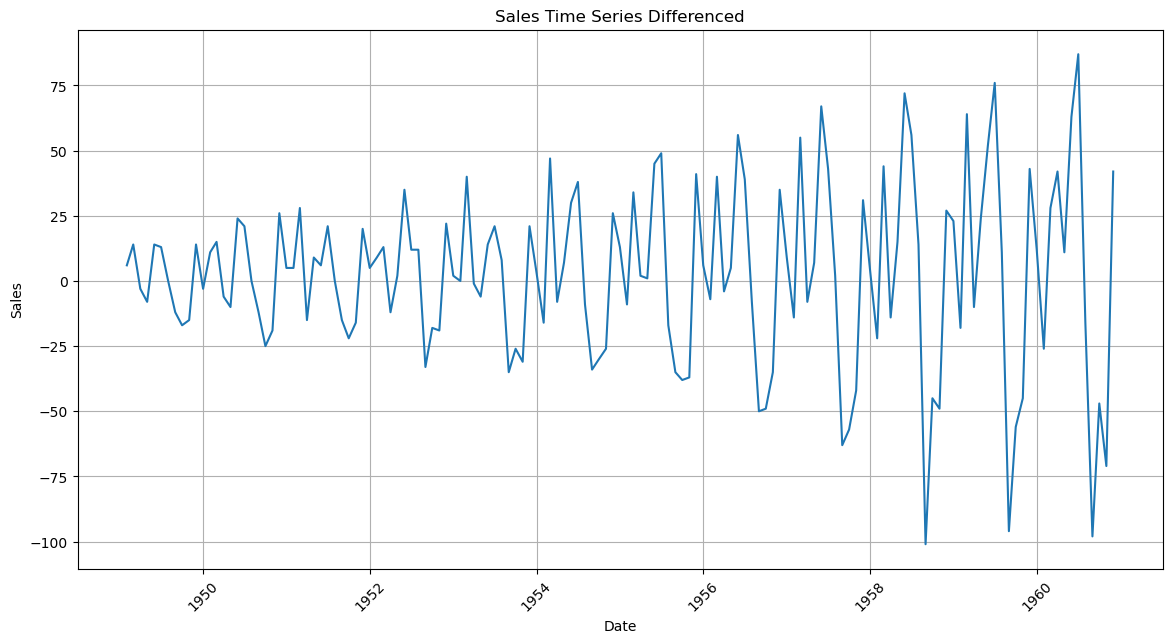

In [7]:
differenced = df['passengers'].diff()

result = adfuller(differenced.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Sales' column is stationary.")
else:
    print("The 'Sales' column is non-stationary.")
    
plt.figure(figsize=(14,7))
plt.plot(differenced)
plt.title('Sales Time Series Differenced')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [8]:
air_df = df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
airP = df[['passengers']].copy(deep=True)
airP['firstDiff'] = airP['passengers'].diff()
airP['Diff12'] = airP['passengers'].diff(12)

In [10]:
airP.head()

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


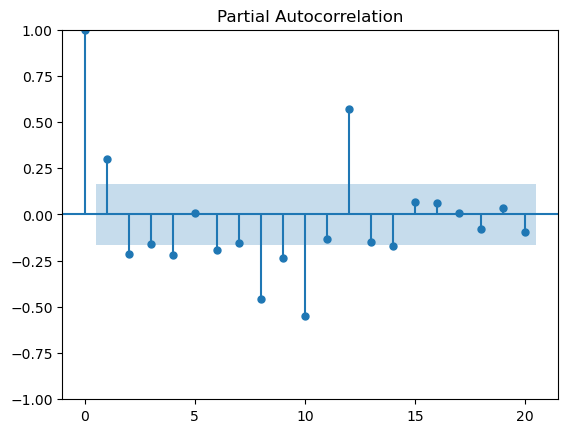

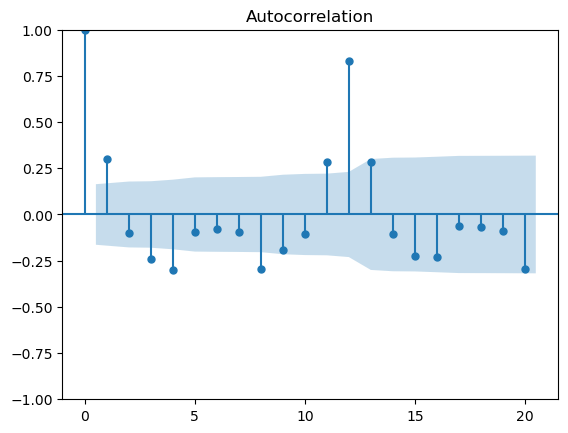

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(differenced.dropna(),lags=20);

plot_acf(differenced.dropna(),lags=20);

In [12]:
train_size=int(len(df)*0.8)
train=df[:train_size]
test=df[train_size:]

In [13]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Initialize the dictionary to store AIC values
metric_aic_dict = {}

# Loop through all combinations of (p, d, q) and (P, D, Q, S)
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            # Fit the SARIMAX model
            model = SARIMAX(train['passengers'], order=param, seasonal_order=seasonal_param)
            model_fit = model.fit(disp=False)

            # Calculate AIC
            aic = model_fit.aic

            # Store results in the dictionary
            metric_aic_dict[(param, seasonal_param)] = aic
        except:
            continue

C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency in

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Initialize the dictionary to store AIC values
metric_aic_dict2 = {}

# Loop through all combinations of (p, d, q) and (P, D, Q, S)
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            # Fit the SARIMAX model
            model = SARIMAX(train['passengers'], order=param, seasonal_order=seasonal_param)
            model_fit = model.fit()

            # Calculate AIC
            aic = model_fit.aic

            # Store results in the dictionary
            metric_aic_dict2[(param, seasonal_param)] = aic
        except:
            continue


C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency in

In [21]:
sorted_metric_aic_dict = {k: v for k, v in sorted(metric_aic_dict.items(), key=lambda x: x[1])}
sorted_metric_aic_dict2 = {k: v for k, v in sorted(metric_aic_dict2.items(), key=lambda x: x[1])}

In [22]:
sorted_metric_aic_dict

{((1, 1, 0), (0, 1, 0, 12)): 755.4993655556575,
 ((1, 1, 0), (1, 1, 0, 12)): 755.750271004056,
 ((1, 1, 0), (0, 1, 1, 12)): 755.9815409355406,
 ((0, 1, 1), (0, 1, 0, 12)): 756.0113506845998,
 ((1, 1, 1), (0, 1, 0, 12)): 756.021962795988,
 ((0, 1, 1), (1, 1, 0, 12)): 756.1655758988526,
 ((0, 1, 1), (0, 1, 1, 12)): 756.3802818130989,
 ((1, 1, 1), (1, 1, 0, 12)): 756.4056106676757,
 ((1, 1, 1), (0, 1, 1, 12)): 756.6285159375473,
 ((0, 1, 0), (1, 1, 0, 12)): 756.9591640166979,
 ((0, 1, 0), (0, 1, 1, 12)): 756.9881631129691,
 ((1, 1, 0), (1, 1, 1, 12)): 757.648689363343,
 ((0, 1, 0), (0, 1, 0, 12)): 757.8259224782274,
 ((0, 1, 1), (1, 1, 1, 12)): 758.1068769348959,
 ((1, 1, 1), (1, 1, 1, 12)): 758.2601973914717,
 ((0, 1, 0), (1, 1, 1, 12)): 758.9218654183766,
 ((1, 0, 1), (0, 1, 0, 12)): 765.5435737521829,
 ((1, 0, 1), (1, 1, 0, 12)): 766.0622703623061,
 ((1, 0, 1), (0, 1, 1, 12)): 766.2655160575335,
 ((1, 0, 0), (1, 1, 0, 12)): 766.4918731401594,
 ((1, 0, 1), (1, 1, 1, 12)): 766.5503743525

In [18]:
sorted_metric_aic_dict2

{((1, 1, 0), (0, 1, 0, 12)): 755.4993655556575,
 ((1, 1, 0), (1, 1, 0, 12)): 755.750271004056,
 ((1, 1, 0), (0, 1, 1, 12)): 755.9815409355406,
 ((0, 1, 1), (0, 1, 0, 12)): 756.0113506845998,
 ((1, 1, 1), (0, 1, 0, 12)): 756.021962795988,
 ((0, 1, 1), (1, 1, 0, 12)): 756.1655758988526,
 ((0, 1, 1), (0, 1, 1, 12)): 756.3802818130989,
 ((1, 1, 1), (1, 1, 0, 12)): 756.4056106676757,
 ((1, 1, 1), (0, 1, 1, 12)): 756.6285159375473,
 ((0, 1, 0), (1, 1, 0, 12)): 756.9591640166979,
 ((0, 1, 0), (0, 1, 1, 12)): 756.9881631129691,
 ((1, 1, 0), (1, 1, 1, 12)): 757.648689363343,
 ((0, 1, 0), (0, 1, 0, 12)): 757.8259224782274,
 ((0, 1, 1), (1, 1, 1, 12)): 758.1068769348959,
 ((1, 1, 1), (1, 1, 1, 12)): 758.2601973914717,
 ((0, 1, 0), (1, 1, 1, 12)): 758.9218654183766,
 ((1, 0, 1), (0, 1, 0, 12)): 765.5435737521829,
 ((1, 0, 1), (1, 1, 0, 12)): 766.0622703623061,
 ((1, 0, 1), (0, 1, 1, 12)): 766.2655160575335,
 ((1, 0, 0), (1, 1, 0, 12)): 766.4918731401594,
 ((1, 0, 1), (1, 1, 1, 12)): 766.5503743525